In [4]:
import cv2
import matplotlib.pyplot as plt

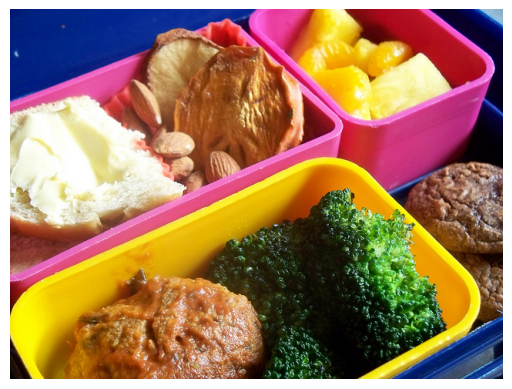

In [6]:
img = cv2.imread("data/train2017/000000000009.jpg") # Load image

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # cv2 loads image in bgr format

plt.imshow(img_rgb)
plt.axis('off')
plt.show()

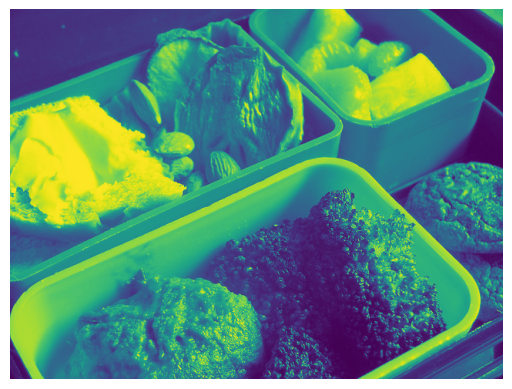

In [4]:
# Convert to Graysclae and save
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')
plt.show()

Filters & Edge Detection

1.1 What is Filter?
If images are the functions mapping image locations to the pixel values, then filters are systems that form new and enhanced image from combination of orignial image pixel values.  each pixel of the image has three channels and is represented as a 1x3 vector.

https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html

1.2. Edge Detection is importat because edges are one of the most distinct features of the images and regions with high gradient.

1.3 Canny Edge Detection
Step 1:  Apply Gaussian Blur
Step 2: Compute gradient magnitude using Sobel Filter. Sobel filter computes 1st derivative of of image gradient. Hence change in intensity in 1 direction. Therefore Sobel filter is applied as G_x and G_y.
Step 3: Non-maximum suppression - only keep strongest edge
Step 4: Hysteresis Thresholding - using 2 thresholds


In [5]:
# Mini Project - RealTime Canny Edge Detection from Webcam
import cv2

cap = cv2.VideoCapture(0)   # Open webcam 

# Set resolution
cap.set(3, 640)
cap.set(4, 480)
print("Press q to quit.")

while True:
    # Capture image
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab Frame")
        break  

    # convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply gaussian blur
    blurred = cv2.GaussianBlur(gray, (5,5), 1.4)

    # Apply canny detection
    edges = cv2.Canny(gray, 100, 200)

    #Stack original and edge etected image
    combined = cv2.hconcat([gray, edges])

    cv2.imshow('Webcam: Grayscale (left) + Edges (right)', combined)

    # Press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Press q to quit.


In [1]:
# Contours and Object Localization
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)

print("Press q to quit")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 1.4)
    edges = cv2.Canny(gray, 100, 200)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contour on original frame
    cv2.drawContours(frame, contours, -1, (0,255,0), 2)

    # Draw bounding boxes
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if w > 40 and h > 40:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)

    # Show result
    cv2.imshow("Contours and Bounding boxes", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Press q to quit
